In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

# Load dataset
df = pd.read_csv("netflix.csv")

In [5]:
#DATA CLEANING 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          40 non-null     object 
 1   type           40 non-null     object 
 2   language       40 non-null     object 
 3   region         40 non-null     object 
 4   release_year   40 non-null     int64  
 5   primary_genre  40 non-null     object 
 6   genre_blend    40 non-null     object 
 7   theme          40 non-null     object 
 8   tone           40 non-null     object 
 9   pacing         40 non-null     object 
 10  content_era    40 non-null     object 
 11  imdb_rating    40 non-null     float64
 12  rating         40 non-null     object 
 13  duration       40 non-null     object 
 14  country        38 non-null     object 
dtypes: float64(1), int64(1), object(13)
memory usage: 4.8+ KB


In [6]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [7]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

In [8]:
# Handle missing values
missing_summary = df.isnull().sum()
print("Missing values per column:\n", missing_summary)

Missing values per column:
 title            0
type             0
language         0
region           0
release_year     0
primary_genre    0
genre_blend      0
theme            0
tone             0
pacing           0
content_era      0
imdb_rating      0
rating           0
duration         0
country          2
dtype: int64


In [9]:
# Fill or drop missing values (example)
df['imdb_rating'].fillna(df['imdb_rating'].median(), inplace=True)
df.dropna(subset=['primary_genre', 'theme', 'tone'], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_27440\1105444059.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['imdb_rating'].fillna(df['imdb_rating'].median(), inplace=True)


In [10]:
# Convert data types if needed
df['release_year'] = df['release_year'].astype(int)
df['imdb_rating'] = df['imdb_rating'].astype(float)

type
Movie      29
TV Show    11
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_27440\4242355779.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


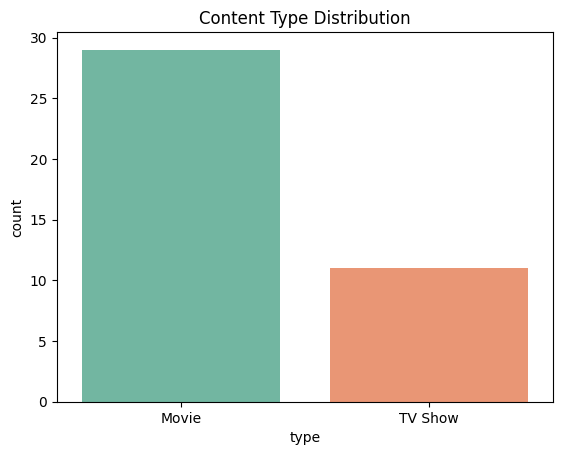

In [11]:
# Exploratory Data Analysis (EDA)
#1.General Content Trends

print(df['type'].value_counts())
sns.countplot(x='type', data=df, palette='Set2')
plt.title("Content Type Distribution")
plt.show()

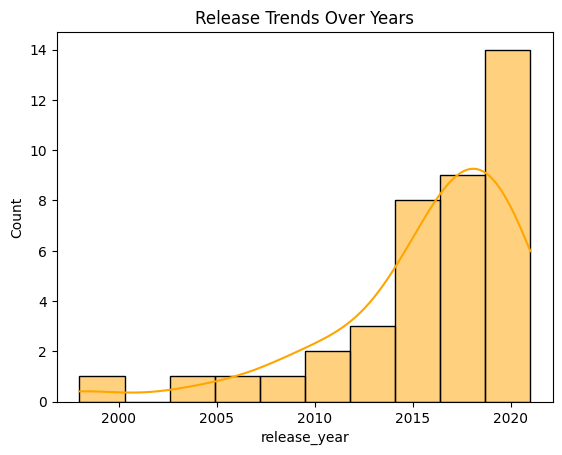

In [12]:
#Content Over the Years

sns.histplot(data=df, x="release_year", bins=10, kde=True, color="orange")
plt.title("Release Trends Over Years")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_27440\127286104.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="type", y="imdb_rating", palette="coolwarm")


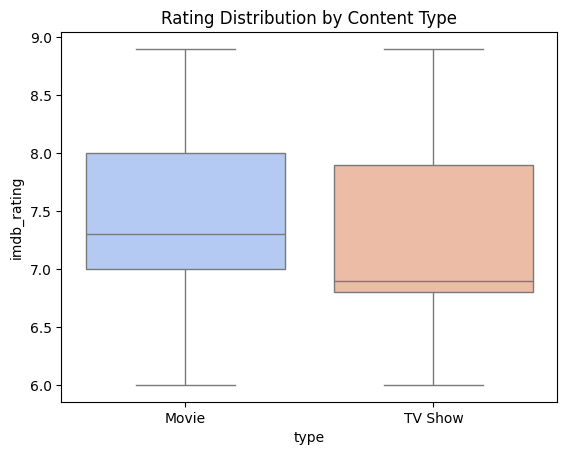

In [13]:
# IMDb Rating Distribution

sns.boxplot(data=df, x="type", y="imdb_rating", palette="coolwarm")
plt.title("Rating Distribution by Content Type")
plt.show()

imdb_rating
7.8    4
6.8    3
8.0    3
7.1    3
6.9    2
6.0    2
8.9    2
8.6    2
6.3    2
8.7    2
7.3    2
7.2    2
7.6    1
6.5    1
8.1    1
8.4    1
8.8    1
6.6    1
7.7    1
7.4    1
6.7    1
7.0    1
6.4    1
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_27440\1007095111.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='imdb_rating', data=df, palette='Set2')


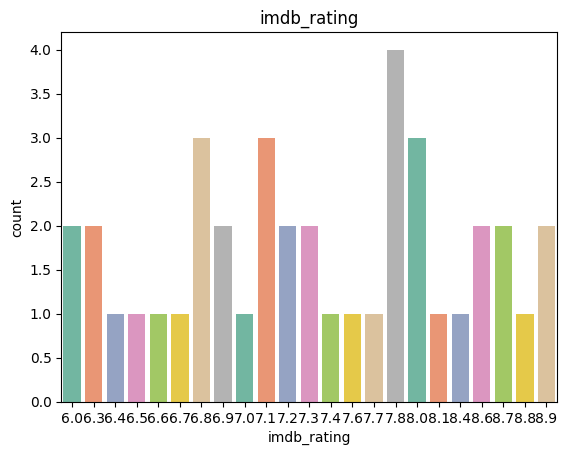

In [18]:
print(df['imdb_rating'].value_counts())
sns.countplot(x='imdb_rating', data=df, palette='Set2')
plt.title("imdb_rating")
plt.show()

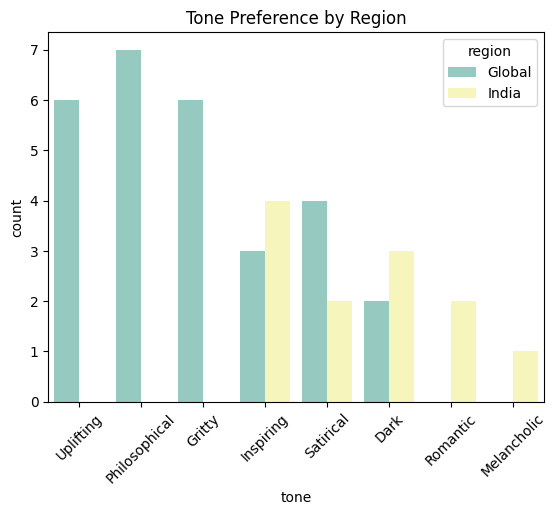

In [19]:
#Region vs Tone
sns.countplot(data=df, x="tone", hue="region", palette="Set3")
plt.title("Tone Preference by Region")
plt.xticks(rotation=45)
plt.show()

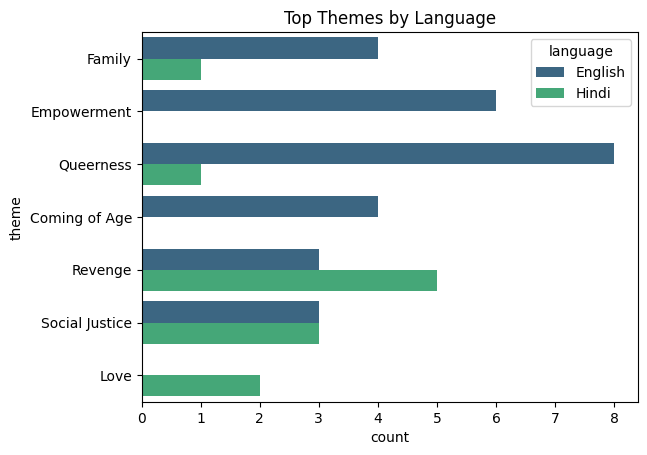

In [20]:
#Themes by Language
sns.countplot(data=df, y="theme", hue="language", palette="viridis")
plt.title("Top Themes by Language")
plt.show()

In [21]:
#CONTENT  ANALYSIS 

#A. Viewer-Centric Insights

high_rated = df[df['imdb_rating'] > 8.0]
low_rated = df[df['imdb_rating'] < 6.5]

print("Top tones in high-rated content:\n", high_rated['tone'].value_counts())
print("Top pacing in low-rated content:\n", low_rated['pacing'].value_counts())




Top tones in high-rated content:
 tone
Gritty           2
Inspiring        2
Satirical        2
Philosophical    1
Uplifting        1
Melancholic      1
Name: count, dtype: int64
Top pacing in low-rated content:
 pacing
Medium    3
Slow      1
Fast      1
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_27440\3545240896.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="genre_blend", y="imdb_rating", palette="Blues")


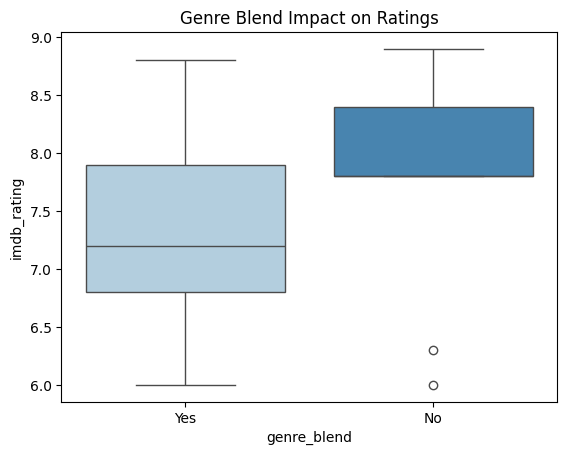

In [22]:
# B. Genre Blend vs Viewer Ratings

sns.boxplot(data=df, x="genre_blend", y="imdb_rating", palette="Blues")
plt.title("Genre Blend Impact on Ratings")
plt.show()

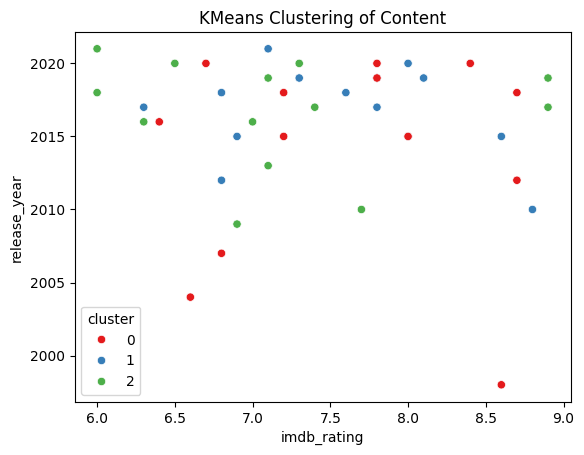

In [23]:
#c. Cluster Similar Shows (KMeans)
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Encode categorical for clustering
encoded_df = df[['imdb_rating', 'pacing', 'tone', 'theme']].copy()
for col in ['pacing', 'tone', 'theme']:
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col])

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(encoded_df)

sns.scatterplot(data=df, x="imdb_rating", y="release_year", hue="cluster", palette="Set1")
plt.title("KMeans Clustering of Content")
plt.show()

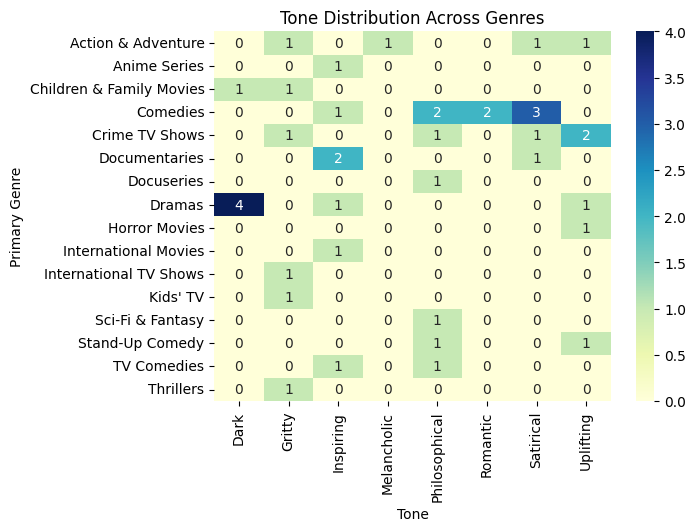

In [28]:
# Genre vs Tone Heatmap
genre_tone = pd.crosstab(df['primary_genre'], df['tone'])
sns.heatmap(genre_tone, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Tone Distribution Across Genres")
plt.ylabel("Primary Genre")
plt.xlabel("Tone")
plt.show()

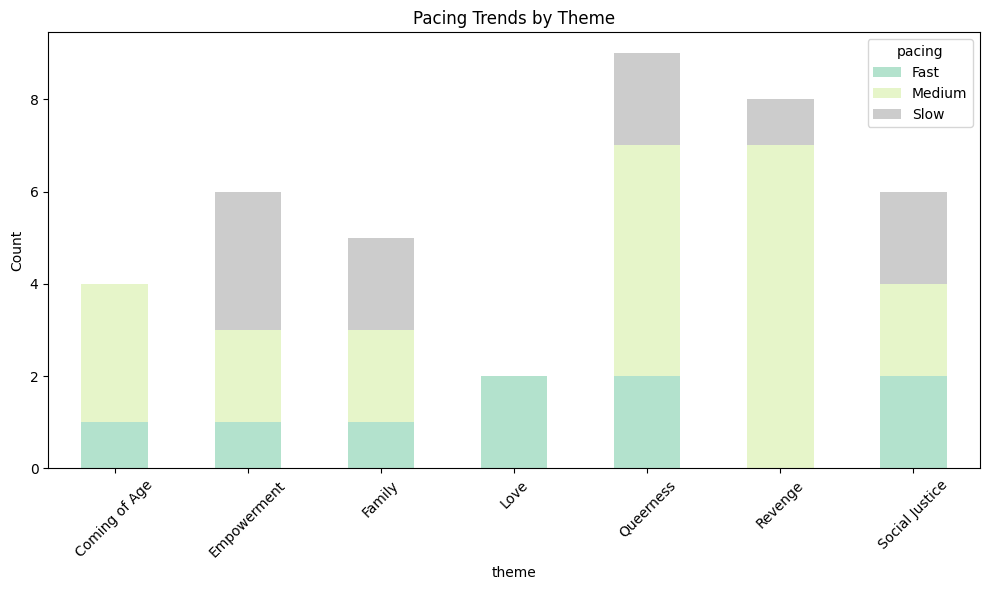

In [29]:
#Pacing Distribution by Theme
theme_pacing = pd.crosstab(df['theme'], df['pacing'])
theme_pacing.plot(kind='bar', stacked=True, colormap='Pastel2', figsize=(10, 6))
plt.title("Pacing Trends by Theme")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_27440\994237268.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="tone", y="imdb_rating", palette="Set3")


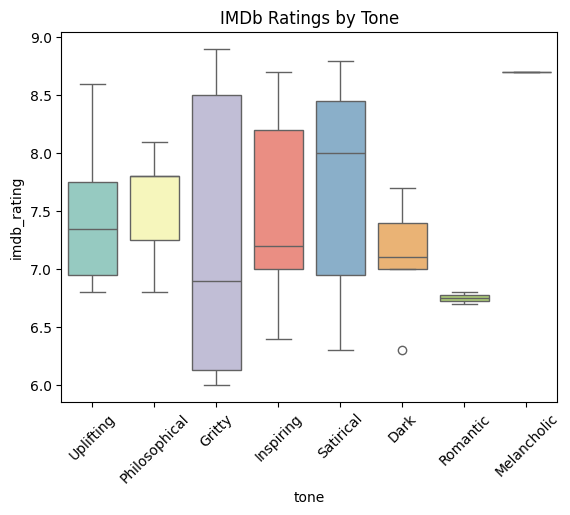

In [30]:
#Dual Analysis: Tone vs IMDb Rating

sns.boxplot(data=df, x="tone", y="imdb_rating", palette="Set3")
plt.title("IMDb Ratings by Tone")
plt.xticks(rotation=45)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_27440\1924264276.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=diversity, x="Theme Diversity", y="Primary Genre", palette="plasma")
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


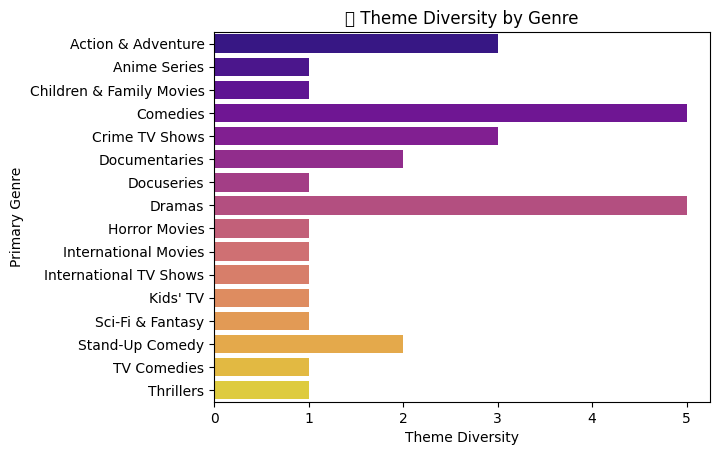

In [31]:
# Theme Diversity Score

diversity = df.groupby('primary_genre')['theme'].nunique().reset_index()
diversity.columns = ['Primary Genre', 'Theme Diversity']
sns.barplot(data=diversity, x="Theme Diversity", y="Primary Genre", palette="plasma")
plt.title(" Theme Diversity by Genre")
plt.show()

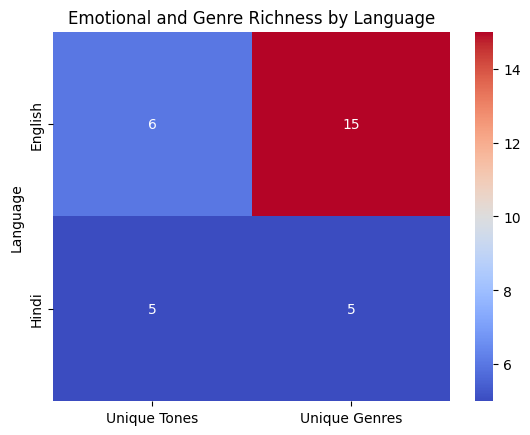

In [33]:
#Language Richness Heatmap

lang_richness = df.groupby('language')[['tone', 'primary_genre']].nunique().reset_index()
lang_richness.columns = ['Language', 'Unique Tones', 'Unique Genres']

sns.heatmap(lang_richness.set_index('Language'), annot=True, cmap="coolwarm", fmt="d")
plt.title("Emotional and Genre Richness by Language")
plt.show()

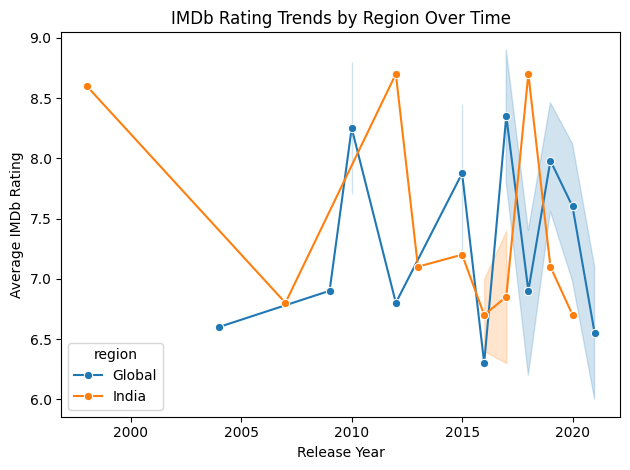

In [35]:
#IMDb Rating Trends Over Time

sns.lineplot(data=df, x="release_year", y="imdb_rating", hue="region", marker='o')
plt.title("IMDb Rating Trends by Region Over Time")
plt.xlabel("Release Year")
plt.ylabel("Average IMDb Rating")
plt.tight_layout()
plt.show()

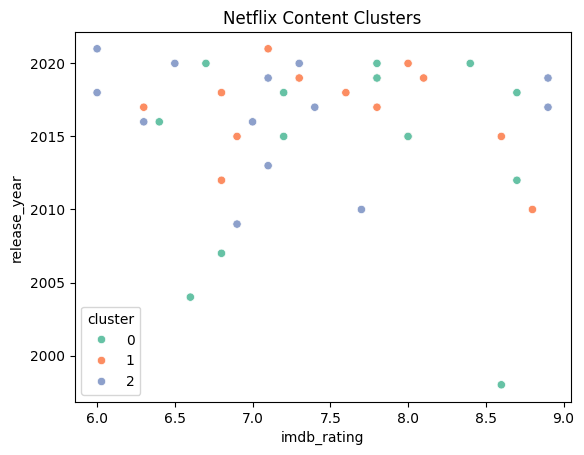

In [37]:
#Content Clustering
sns.scatterplot(data=df, x="imdb_rating", y="release_year", hue="cluster", palette="Set2")
plt.title("Netflix Content Clusters")
plt.show()

In [38]:
df.to_csv("Cleaned_Netflix_Metadata.csv", index=False)
